In [4]:
from datasets import load_dataset

dataset = load_dataset('multi_eurlex', 'en', trust_remote_code=True)

print(dataset['train'][0])


Generating validation split: 100%|██████████| 5000/5000 [00:39<00:00, 125.78 examples/s]

{'celex_id': '32006D0213', 'text': 'COMMISSION DECISION\nof 6 March 2006\nestablishing the classes of reaction-to-fire performance for certain construction products as regards wood flooring and solid wood panelling and cladding\n(notified under document number C(2006) 655)\n(Text with EEA relevance)\n(2006/213/EC)\nTHE COMMISSION OF THE EUROPEAN COMMUNITIES,\nHaving regard to the Treaty establishing the European Community,\nHaving regard to Directive 89/106/EEC of 21 December 1988, on the approximation of laws, regulations and administrative provisions of the Member States relating to construction products (1), and in particular Article 20(2) thereof,\nWhereas:\n(1)\nDirective 89/106/EEC envisages that in order to take account of different levels of protection for construction works at national, regional or local level, it may be necessary to establish in the interpretative documents classes corresponding to the performance of products in respect of each essential requirement. Those do

In [10]:
for key in dataset['train'][1].keys():
    print(key,": ", dataset['train'][1][key])
    print (key)


celex_id :  32003R1330
celex_id
text :  Commission Regulation (EC) No 1330/2003
of 25 July 2003
establishing the standard import values for determining the entry price of certain fruit and vegetables
THE COMMISSION OF THE EUROPEAN COMMUNITIES,
Having regard to the Treaty establishing the European Community,
Having regard to Commission Regulation (EC) No 3223/94 of 21 December 1994 on detailed rules for the application of the import arrangements for fruit and vegetables(1), as last amended by Regulation (EC) No 1947/2002(2), and in particular Article 4(1) thereof,
Whereas:
(1) Regulation (EC) No 3223/94 lays down, pursuant to the outcome of the Uruguay Round multilateral trade negotiations, the criteria whereby the Commission fixes the standard values for imports from third countries, in respect of the products and periods stipulated in the Annex thereto.
(2) In compliance with the above criteria, the standard import values must be fixed at the levels set out in the Annex to this Regula

# Read Data From LDD

In [18]:
import os
import pandas as pd  # Import pandas for DataFrame manipulation


def read_folder_structure(root_dir='.'):
    data = []  # Initialize an empty list to store document information
    index = 0  # Initialize a unique index for each document
    
    # Mapping of class labels to their descriptions
    cls_descriptions = {
        "cs.AI": "Artificial Intelligence",
        "cs.CE": "Computational Engineering",
        "cs.CV": "Computer Vision",
        "cs.DS": "Data Structures",
        "cs.IT": "Information Theory",
        "cs.NE": "Neural and Evolutionary",
        "cs.PL": "Programming Languages",
        "cs.SY": "Systems and Control",
        "math.AC": "Commutative Algebra",
        "math.GR": "Group Theory",
        "math.ST": "Statistics Theory"
    }
    
    # Traverse all folders in the root directory
    for cls_label in os.listdir(root_dir):
        cls_path = os.path.join(root_dir, cls_label)
        
        if os.path.isdir(cls_path):  # Check if the item is a directory
            # Traverse all .txt files in the current folder
            for filename in os.listdir(cls_path):
                if filename.endswith('.txt'):  # Process only .txt files
                    file_id = filename[:-4]  # Remove the .txt extension to get the unique file ID
                    file_path = os.path.join(cls_path, filename)
                    
                    # Read the content of the file
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                    
                    # Append structured data to the list
                    data.append({
                        'index': index,         # Unique index for each document
                        'cls_label': cls_label, # Class label (folder name)
                        'description': cls_descriptions.get(cls_label, ""),  # Class description
                        'file_id': file_id,     # Unique file ID (filename without extension)
                        'content': content      # File content
                    })
                    
                    index += 1  # Increment the unique index
    
    # Convert the list of dictionaries into a Pandas DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
dataset_df = read_folder_structure("/home/snt/projects_lujun/agentCLS/assets/LDD/Long-document-dataset/extracted_dataset")
print(f"Successfully read {len(dataset_df)} documents")



Successfully read 33388 documents


In [19]:
dataset_df

,index,cls_label,description,file_id,content
0,0,cs.CE,Computational Engineering,0902.0763v1.pdf,Genetic algorithm based optimization and post\...
1,1,cs.CE,Computational Engineering,1708.08551v1.pdf,Deep Learning for Accelerated Reliability Anal...
2,2,cs.CE,Computational Engineering,0705.1759v1.pdf,FINITE ELEMENT MODEL UPDATING USING RESPONSE S...
3,3,cs.CE,Computational Engineering,1801.03018v1.pdf,Predict Forex Trend via Convolutional Neural N...
4,4,cs.CE,Computational Engineering,0901.2665v1.pdf,A Density Matrix-based Algorithm for Solving E...
...,...,...,...,...,...
33383,33383,cs.IT,Information Theory,1702.03692v3.pdf,SUBMITTED TO IEEE TRANSACTIONS ON WIRELESS COM...
33384,33384,cs.IT,Information Theory,1710.08671v2.pdf,Linear State Estimation via 5G C-RAN Cellular\...
33385,33385,cs.IT,Information Theory,1707.00421v2.pdf,On Binary Matroid Minors and Applications to\n...
33386,33386,cs.IT,Information Theory,1712.06804v1.pdf,1\n\nAsymptotic Coupling and Its Applications ...


In [21]:
dataset_df[["cls_label","description"]].value_counts()

cls_label  description              
cs.DS      Data Structures              4136
cs.IT      Information Theory           3233
cs.SY      Systems and Control          3106
math.GR    Group Theory                 3065
math.ST    Statistics Theory            3025
cs.NE      Neural and Evolutionary      3012
cs.AI      Artificial Intelligence      2995
cs.PL      Programming Languages        2901
math.AC    Commutative Algebra          2885
cs.CV      Computer Vision              2525
cs.CE      Computational Engineering    2505
Name: count, dtype: int64

In [25]:
dataset_df = dataset_df.drop_duplicates(subset=["file_id"])

In [26]:
dataset_df[["cls_label","description"]].value_counts()

cls_label  description              
cs.DS      Data Structures              4011
math.GR    Group Theory                 3064
cs.SY      Systems and Control          3061
math.ST    Statistics Theory            3016
cs.IT      Information Theory           2954
math.AC    Commutative Algebra          2857
cs.AI      Artificial Intelligence      2758
cs.NE      Neural and Evolutionary      2625
cs.PL      Programming Languages        2585
cs.CV      Computer Vision              2525
cs.CE      Computational Engineering    2505
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split


def split_dataset(df, train_ratio=0.7, random_state=42):
    # Initialize the 'split' column with 'train'
    df['split'] = 'train'
    
    # Get unique class labels
    unique_labels = df['cls_label'].unique()
    
    # For each class label, split the data
    for label in unique_labels:
        label_indices = df[df['cls_label'] == label].index
        train_indices, val_indices = train_test_split(
            label_indices,
            train_size=train_ratio,
            random_state=random_state
        )
        
        # Mark validation samples
        df.loc[val_indices, 'split'] = 'validation'
    
    return df

dataset_df = split_dataset(dataset_df)

print(f"Total documents: {len(dataset_df)}")
print(f"Training documents: {len(dataset_df[dataset_df['split'] == 'train'])}")
print(f"Validation documents: {len(dataset_df[dataset_df['split'] == 'validation'])}")

# Verify the split ratio for each class
print("\nSplit ratio for each class:")
print(dataset_df.groupby(['cls_label', 'split']).size().unstack(fill_value=0))


Total documents: 31961
Training documents: 22366
Validation documents: 9595

Split ratio for each class:
split      train  validation
cls_label                   
cs.AI       1930         828
cs.CE       1753         752
cs.CV       1767         758
cs.DS       2807        1204
cs.IT       2067         887
cs.NE       1837         788
cs.PL       1809         776
cs.SY       2142         919
math.AC     1999         858
math.GR     2144         920
math.ST     2111         905


/tmp/ipykernel_561245/3566951953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'] = 'train'


In [32]:
dataset_df['content_length'] = dataset_df['content'].apply(len)

/tmp/ipykernel_561245/3471668958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['content_length'] = dataset_df['content'].apply(len)


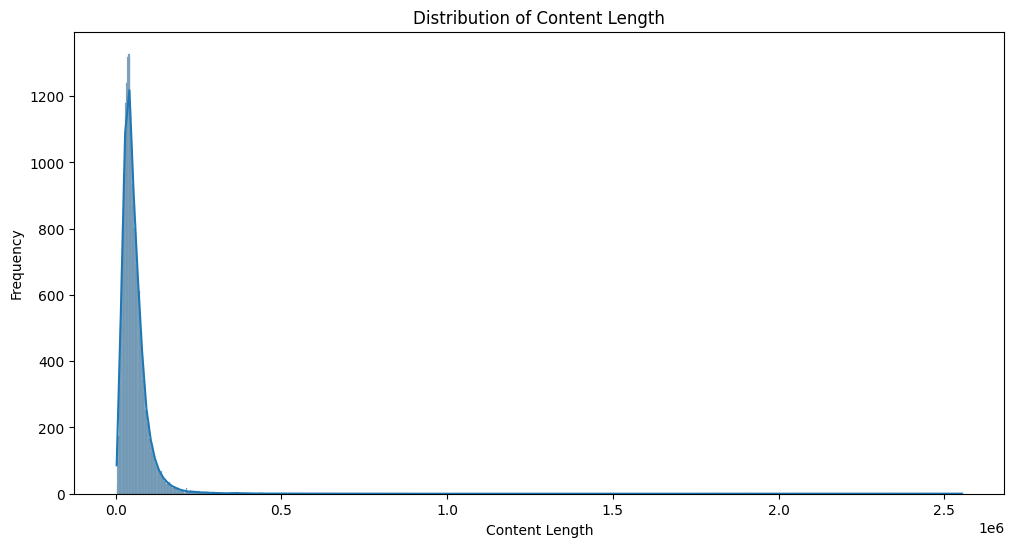

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=dataset_df, x='content_length', kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


In [37]:
dataset_df.to_json("/home/snt/projects_lujun/agentCLS/assets/LDD_split.json", lines=True, orient='records')

# Read EURLEX57K

In [66]:
import pandas as pd


EURLEX57K_train = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K/train.jsonl", lines=True)
EURLEX57K_train["split"] = "train"

EURLEX57K_dev = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K/dev.jsonl", lines=True)
EURLEX57K_dev["split"] = "dev"

EURLEX57K_test = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K/test.jsonl", lines=True)
EURLEX57K_test["split"] = "test"


EURLEX57K = pd.concat([EURLEX57K_train, EURLEX57K_dev, EURLEX57K_test])


In [67]:
EURLEX57K["content"] = (
    EURLEX57K["title"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)).fillna('') + "\n" +
    EURLEX57K["recitals"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)).fillna('') + "\n" +
    EURLEX57K["main_body"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)).fillna('')
)


In [68]:
EURLEX57K["content_length"] = EURLEX57K["content"].apply(len)

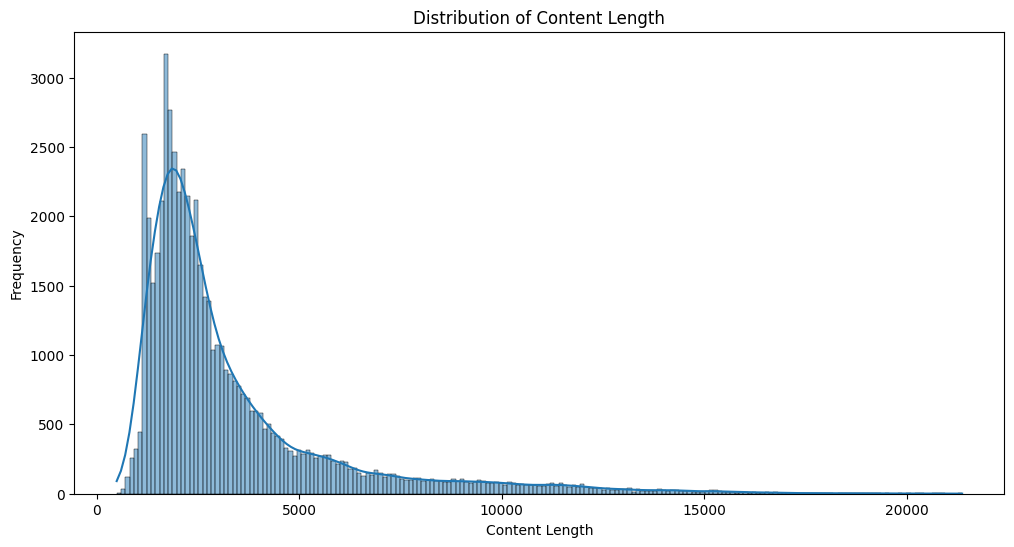

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=EURLEX57K, x='content_length', kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()

In [70]:
EURLEX57K["cls_label"] = EURLEX57K["document_type"]

In [71]:
EURLEX57K["split"] = EURLEX57K["split"].replace({"dev": "validation", "test": "validation"})


In [73]:
EURLEX57K["split"].value_counts()

split
train         45000
validation    12000
Name: count, dtype: int64

In [74]:
EURLEX57K.to_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json", lines=True, orient='records')

In [2]:
import pandas as pd

EURLEX57K = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json", lines=True)

<Axes: title={'center': 'Class Distribution'}, xlabel='cls_label'>

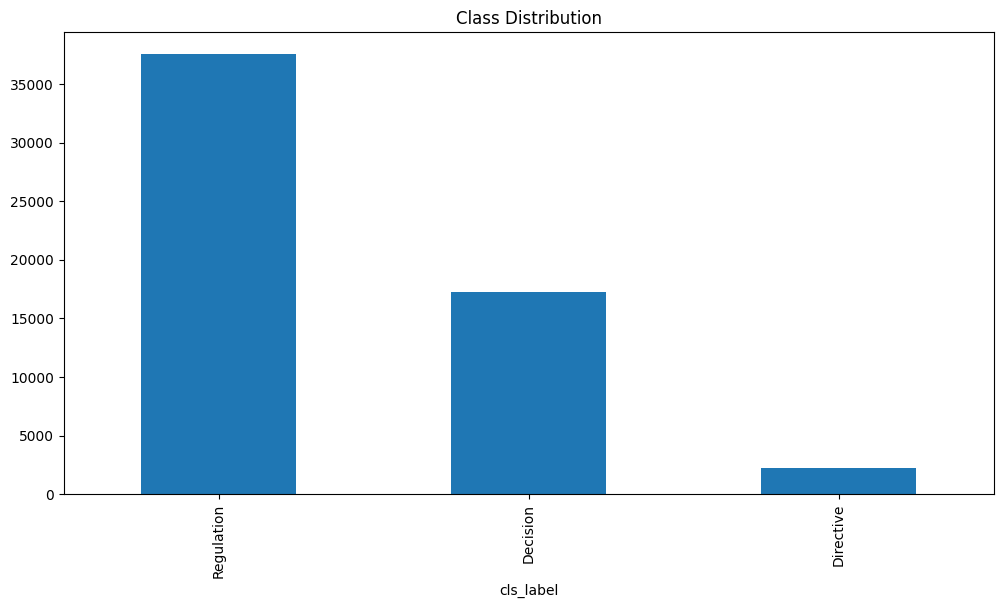

In [6]:
EURLEX57K.cls_label.value_counts().plot(kind='bar', figsize=(12, 6), title='Class Distribution')

In [2]:
import pandas as pd 


df= pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json", lines=True)


In [4]:
df["description"] = df["cls_label"]

In [5]:
df.to_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json", lines=True, orient='records')

## Make Dataset More Feasible Like 10, 100, 500, 1000

In [1]:
import pandas as pd 

LDD_split = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/LDD_split.json", lines=True)
EURLEX57K_split = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json", lines=True)

In [6]:
LDD_split.cls_label.value_counts()

cls_label
cs.DS      4011
math.GR    3064
cs.SY      3061
math.ST    3016
cs.IT      2954
math.AC    2857
cs.AI      2758
cs.NE      2625
cs.PL      2585
cs.CV      2525
cs.CE      2505
Name: count, dtype: int64

In [5]:
EURLEX57K_split.cls_label.value_counts()

cls_label
Regulation    37531
Decision      17239
Directive      2230
Name: count, dtype: int64

In [46]:
import pandas as pd

def downsample_proportional(df, max_samples_per_class, random_seed=42):
    counts = df['cls_label'].value_counts()
    total_target_samples = max_samples_per_class * len(counts)
    total_current_samples = counts.sum() 
    ratio = total_target_samples / total_current_samples 

    def downsample(group):
        n_samples = min(max_samples_per_class, max(1, int(len(group) * ratio)))
        return group.sample(n=n_samples, random_state=random_seed)

    return df.groupby('cls_label', group_keys=False).apply(downsample)


def downsample_equal(df, max_samples_per_class, random_seed=42):

    def downsample(group):
        n_samples = min(max_samples_per_class, len(group))
        return group.sample(n=n_samples, random_state=random_seed)

    return df.groupby('cls_label', group_keys=False).apply(downsample)


import pandas as pd 


train_max_num = 50
val_max_num = 300

input_path  = "/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json"
dataset_name = input_path.split("/")[-1].split(".")[0]
input_dataset = pd.read_json(input_path, lines=True)
df_sampled_val = downsample_equal(input_dataset[input_dataset["split"]=="validation"], max_samples_per_class=val_max_num)
df_sampled_train = downsample_proportional(input_dataset[input_dataset["split"]=="train"], max_samples_per_class=train_max_num)

print (df_sampled_train.cls_label.value_counts().sort_values(ascending=False))
print (df_sampled_val.cls_label.value_counts().sort_values(ascending=False))
df_sampled = pd.concat([df_sampled_train, df_sampled_val], axis=0)
print (df_sampled.cls_label.value_counts().sort_values(ascending=False))

df_sampled.to_json(f"/home/snt/projects_lujun/agentCLS/assets/{dataset_name}_proportional_train_{train_max_num}_val_{val_max_num}.json", lines=True, orient='records')


cls_label
Regulation    50
Decision      45
Directive      5
Name: count, dtype: int64
cls_label
Decision      300
Directive     300
Regulation    300
Name: count, dtype: int64
cls_label
Regulation    350
Decision      345
Directive     305
Name: count, dtype: int64


/tmp/ipykernel_1226418/4284767600.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('cls_label', group_keys=False).apply(downsample)
/tmp/ipykernel_1226418/4284767600.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('cls_label', group_keys=False).apply(downsample)


In [56]:
import pandas as pd 


train_max_num = 1500
val_max_num = 300

input_path  = "/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split.json"
dataset_name = input_path.split("/")[-1].split(".")[0]
input_dataset = pd.read_json(input_path, lines=True)
df_sampled_val = downsample_equal(input_dataset[input_dataset["split"]=="validation"], max_samples_per_class=val_max_num)
df_sampled_train = downsample_proportional(input_dataset[input_dataset["split"]=="train"], max_samples_per_class=train_max_num)

print (df_sampled_train.cls_label.value_counts().sort_values(ascending=False))
print (df_sampled_val.cls_label.value_counts().sort_values(ascending=False))
df_sampled = pd.concat([df_sampled_train, df_sampled_val], axis=0)
print (df_sampled.cls_label.value_counts().sort_values(ascending=False))

df_sampled.to_json(f"/home/snt/projects_lujun/agentCLS/assets/{dataset_name}_proportional_train_{train_max_num}_val_{val_max_num}.json", lines=True, orient='records')


/tmp/ipykernel_1226418/4284767600.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('cls_label', group_keys=False).apply(downsample)
/tmp/ipykernel_1226418/4284767600.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('cls_label', group_keys=False).apply(downsample)


cls_label
Regulation    1500
Decision      1362
Directive      177
Name: count, dtype: int64
cls_label
Decision      300
Directive     300
Regulation    300
Name: count, dtype: int64
cls_label
Regulation    1800
Decision      1662
Directive      477
Name: count, dtype: int64


In [ ]:
import pandas as pd

EURLEX57K = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split_proportional_train_1500_val_300.json", lines=True).cls_label.value_counts().sort_values(ascending=False)

FileNotFoundError: File /home/snt/projects_lujun/agentCLS/assets/EURLEX57K_proportional_train_1500_val_300.json does not exist

In [ ]:
LDD_150 = pd.read_json("/home/snt/projects_lujun/agentCLS/assets/EURLEX57K_split_proportional_train_150_val_300.json", lines=True).cls_label.value_counts().sort_values(ascending=False)